In [ ]:
# Mounting Google drive for fetching the data & saved model

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing necessary libraries and packages

import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Defining directory of the training data

ROOT_DIR = "/content/drive/MyDrive/Colab Notebooks/MyDataset/"

train_dir = ROOT_DIR + "Train/"

In [ ]:
# Defining the Batch size and the image share

BATCH_SIZE = 32
IMG_SHAPE  = 256

In [ ]:
# Loading training and validation data

train_data_gen = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    color_mode='rgb',
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=(IMG_SHAPE,IMG_SHAPE),
    validation_split=0.2,
    seed=123,
    subset="training"
)

val_data_gen = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    color_mode='rgb',
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=(IMG_SHAPE,IMG_SHAPE),
    validation_split=0.2,
    seed=123,
    subset="validation"
)

Found 5000 files belonging to 5 classes.
Using 4000 files for training.
Found 5000 files belonging to 5 classes.
Using 1000 files for validation.


In [ ]:
# Defining directory for the test data

test_dir = ("/content/drive/MyDrive/Colab Notebooks/MyDataset/Test")

In [ ]:
# Loading in the test data

test_data_gen = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    color_mode='rgb',
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=(IMG_SHAPE,IMG_SHAPE),
    seed=123
)

Found 79 files belonging to 5 classes.


In [ ]:
#Defining the directory of the saved model

from tensorflow.keras.models import load_model
loaded_model = load_model('/content/drive/MyDrive/model/xceptionmodel (1).h5')

In [ ]:
# Looking at the summary of the loaded model

loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 512)               67109376  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                

In [ ]:
# Testing the saved model for the test set

loss, acc = loaded_model.evaluate(test_data_gen)
print('loaded_model - accuracy: {:5.2f}%'.format(100 * acc))

3/3 [==============================] - 22s 6s/step - loss: 10.0030 - accuracy: 0.7468
loaded_model - accuracy: 74.68%


In [ ]:
# Getting true labels

test_image_batch, test_label_batch = next(iter(test_data_gen))
print("Test img batch shape:", test_image_batch.shape)
print("Test label batch shape:", test_label_batch.shape)
print(test_label_batch[0])
true_label_ids = np.argmax(test_label_batch, axis =-1)
print(true_label_ids)
print(true_label_ids.shape)


Test img batch shape: (32, 256, 256, 3)
Test label batch shape: (32, 5)
tf.Tensor([0. 0. 0. 1. 0.], shape=(5,), dtype=float32)
[3 4 0 1 2 0 1 4 2 2 4 2 0 3 1 2 2 3 2 0 4 1 4 1 3 1 3 3 1 2 4 3]
(32,)


1/1 [==============================] - 9s 9s/step


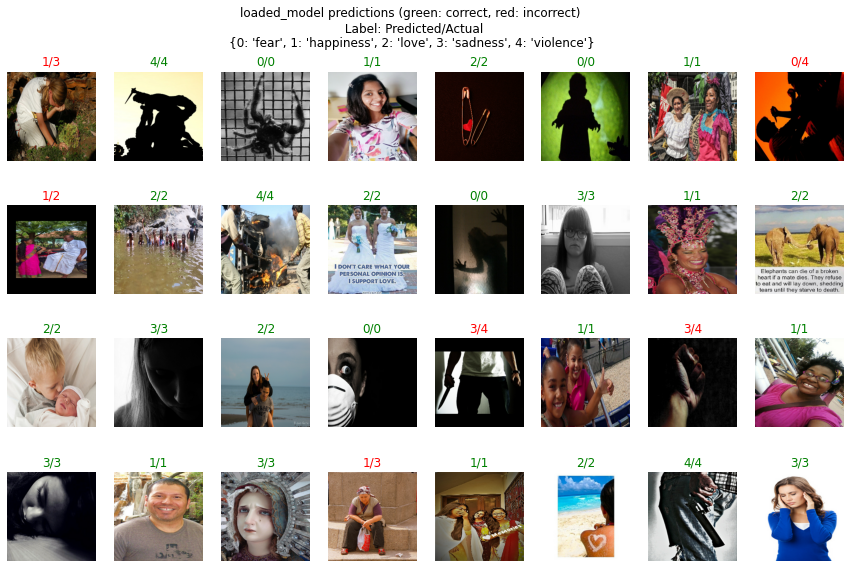

In [ ]:
#To predict both the wrongly classified (wc) and correctly classified (cc) images

import matplotlib.pyplot as plt
tf_loaded_model_predictions = loaded_model.predict(test_image_batch)
plt.figure(figsize=(15,9))
plt.subplots_adjust(hspace=0.5)
for n in range(32):
  plt.subplot(4,8,n+1)
  plt.imshow(test_image_batch[n].numpy().astype("uint8"), cmap = 'Accent')
  if (np.argmax(tf_loaded_model_predictions[n]) == true_label_ids[n]):
    color = "green"
  else:
    color = "red"
  plt.title(str(np.argmax(tf_loaded_model_predictions[n])) + "/" + str(true_label_ids[n]), color=color)
  plt.axis('off')
_ = plt.suptitle("loaded_model predictions (green: correct, red: incorrect) \n Label: Predicted/Actual" "\n{0: 'fear', 1: 'happiness', 2: 'love', 3: 'sadness', 4: 'violence'}")


In [ ]:
#To create a list of Wc and cc images

Wrongly_classified = []
Correctly_classified = []

for n in range(32):
  if (np.argmax(tf_loaded_model_predictions[n]) != true_label_ids[n]):
    Wrongly_classified.append(n)
  else:
    Correctly_classified.append(n)
print(Wrongly_classified)
print(Correctly_classified)

[0, 7, 8, 20, 22, 27]
[1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 23, 24, 25, 26, 28, 29, 30, 31]


In [ ]:
#To predict only the WC images

import matplotlib.pyplot as plt
tf_loaded_model_predictions = loaded_model.predict(test_image_batch)
plt.figure(figsize=(15,9))
plt.subplots_adjust(hspace=0.5)
for n in range(len(Wrongly_classified)):
  plt.subplot(4,8,n+1)
  idx = Wrongly_classified[n]
  plt.imshow(test_image_batch[idx].numpy().astype("uint8"), cmap = 'Accent')
  color = "red"
  plt.title(str(np.argmax(tf_loaded_model_predictions[idx])) + "/" + str(true_label_ids[idx]), color=color)
  plt.axis('off')
_ = plt.suptitle("loaded_model predictions (green: correct, red: incorrect) \n Label: Predicted/Actual" "\n{0: 'fear', 1: 'happiness', 2: 'love', 3: 'sadness', 4: 'violence'}")


In [ ]:
class_names = train_data_gen.class_names
print(class_names)

['fear', 'happiness', 'love', 'sadness', 'violence']


In [ ]:
# Testing an individual image

Image_url = "/content/IMG-20220310-WA0017.jpg"

img = tf.keras.utils.load_img(
    Image_url, target_size=(IMG_SHAPE, IMG_SHAPE)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = loaded_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {}"
    .format(class_names[np.argmax(score)])
)

1/1 [==============================] - 0s 21ms/step
This image most likely belongs to happiness
